In [1]:
import ROOT 
import numpy as np
import matplotlib.pyplot as plt
%jsroot on

Welcome to JupyROOT 6.28/00


In [2]:
#myFile = ROOT.TFile.Open("/Users/abigailpeake/software/nuisance/build/newtune_resultsfile_1000.root")
#myFile = ROOT.TFile.Open("/Users/abigailpeake/software/nuisance/build/050623_newtune_resultsfile_10e5.root")
#myFile = ROOT.TFile.Open("/Users/abigailpeake/software/nuisance/build/10GeVonly_newtune_resultsfile_10e5.root")
myFile = ROOT.TFile.Open("/Users/abigailpeake/software/nuisance/build/10e3events_10GeV_110823_uncommentednew_withhistos.root")

c = ROOT.TCanvas()

In [3]:
histo_a1 = myFile.Q2histrwa1
histo_a2 = myFile.Q2histrwa2
histo_a3 = myFile.Q2histrwa3
histo_a4 = myFile.Q2histrwa4
histo_altogether = myFile.Q2histrwaltogether  #Varying [a1,a2,a3,a4] simultaneously by 1sigma

histo_acv = myFile.Q2histrw #[a1,a2,a3,a4] at their Central Values

histo_a1_minus = myFile.Q2histrwa1minus
histo_a2_minus = myFile.Q2histrwa2minus
histo_a3_minus = myFile.Q2histrwa3minus
histo_a4_minus = myFile.Q2histrwa4minus

histo_altogether_minus = myFile.Q2histrwaltogetherminus


In [4]:
# Extract mean and std of each bin in each histogram
mean_a1 = []
sd_a1 = []

mean_a2 = []
sd_a2 = []

mean_a3 = []
sd_a3 = []

mean_a4 = []
sd_a4 = []

mean_acv= []

mean_altogether = []
sd_altogether = []

Q2 = []
binedge = []

mean_a1_minus = []
mean_a2_minus = []
mean_a3_minus = []
mean_a4_minus = []
mean_altogether_minus = []


#histo_a1.Rebin(20)
nbins = 26
for i in range (0,nbins):
    #print("in bin {}".format(i))
    a1 = histo_a1.GetBinContent(i)
    mean_a1.append(a1)
     
    a2 = histo_a2.GetBinContent(i)
    mean_a2.append(a2)
    
    a3 = histo_a3.GetBinContent(i)
    mean_a3.append(a3)
    
    a4 = histo_a4.GetBinContent(i)
    mean_a4.append(a4)
     
    acv = histo_acv.GetBinContent(i)
    mean_acv.append(acv)
    
    altogether = histo_altogether.GetBinContent(i)
    mean_altogether.append(altogether)
    
    
    a1_minus = histo_a1_minus.GetBinContent(i)
    mean_a1_minus.append(a1_minus)
    
    
    a2_minus = histo_a2_minus.GetBinContent(i)
    mean_a2_minus.append(a2_minus)
    
    a3_minus = histo_a3_minus.GetBinContent(i)
    mean_a3_minus.append(a3_minus)
    
    a4_minus = histo_a4_minus.GetBinContent(i)
    mean_a4_minus.append(a4_minus)
    
    altogether_minus = histo_altogether_minus.GetBinContent(i)
    mean_altogether_minus.append(altogether_minus)
    
    center = histo_altogether.GetBinCenter(i)
    edge = histo_altogether.GetBinLowEdge(i)
    Q2.append(center)
    binedge.append(edge)
#mean_a1 = histo_a1.GetBinContent(9)
print(mean_a1)
print(mean_a2)
print(mean_a3)
print(mean_a4)

print(mean_acv)




[0.0, 302.1547390740699, 219.50387525713415, 112.54793118227322, 87.09451934650231, 40.017870632455846, 24.492121707796343, 15.015116785109411, 8.577465133753575, 11.081769278805897, 6.820322519615645, 2.800176474941653, 3.968156959395227, 0.8992118203825255, 1.1277238795226485, 4.489210853161476, 2.7838358295852084, 0.0, 1.8097657161937826, 0.0, 0.0, 0.0, 2.9226185729409213, 0.0, 0.0, 0.0]
[0.0, 305.48060087405537, 238.20762895360625, 134.1272103143216, 114.32928022695204, 57.59709842658867, 38.534820487531604, 24.84475589171234, 14.79944618610772, 18.37543203655291, 11.105153934209149, 4.642579938719203, 5.870867778511085, 1.2187806756275388, 1.225851709765635, 5.148418871427844, 2.6443858727103358, 0.0, 1.3995502043005918, 0.0, 0.0, 0.0, 1.5566579531830473, 0.0, 0.0, 0.0]
[0.0, 315.3580664264022, 251.46535982194882, 145.0968743326355, 129.32492047599723, 69.21427919559541, 50.25652435182135, 35.05431998470447, 22.665232368634744, 30.459261631135202, 20.327270983059606, 9.83817399740

In [5]:
c1 = ROOT.TCanvas()
histo_a1.Draw("CHIST")
histo_acv.Draw("CHIST")


c1.Draw()

Now let's calculate the ratios: Need to know $F_{A}(a_{i}+ \sigma) / F_{A}(a_{cv})$ so I can copmare to the results I had before using the Covariance matrix

In [6]:
a1_ratio = np.divide(mean_a1, mean_acv)
a2_ratio = np.divide(mean_a2, mean_acv)
a3_ratio = np.divide(mean_a3, mean_acv)
a4_ratio = np.divide(mean_a4, mean_acv)
a_altogether_ratio = np.divide(mean_altogether, mean_acv)


a1_ratio_minus = np.divide(mean_a1_minus, mean_acv)
a2_ratio_minus = np.divide(mean_a2_minus, mean_acv)
a3_ratio_minus = np.divide(mean_a3_minus, mean_acv)
a4_ratio_minus = np.divide(mean_a4_minus, mean_acv)
a_altogether_ratio_minus = np.divide(mean_altogether_minus, mean_acv)


print(a1_ratio)
print(a1_ratio_minus)

print(mean_a1_minus)
print(mean_a1)

[       nan 0.95373928 0.87681751 0.80180177 0.7373917  0.68342254
 0.63811357 0.61964293 0.60710435 0.64593711 0.67199477 0.69289228
 0.78598469 0.88902335 1.11565696 1.11233443 1.3782563         nan
 1.78929698        nan        nan        nan 2.89573479        nan
        nan        nan]
[       nan 1.03053221 1.12103666 1.23341937 1.36740347 1.52391728
 1.72840443 1.92999025 2.15615415 2.37066287 2.66728557 3.2332603
 3.36617555 3.86358065 3.96290922 4.57037145 5.01625237        nan
 5.95460795        nan        nan        nan 7.91334092        nan
        nan        nan]
[0.0, 326.4835570668792, 280.6420799324094, 173.1335652543381, 161.50622229340934, 89.23311931969283, 66.33974513983291, 46.76730332737967, 30.463192904565947, 40.671357005179125, 27.071264138228155, 13.066532471286163, 16.994622266805525, 3.907858422810489, 4.005771960964087, 18.445316884734517, 10.131949353842138, 0.0, 6.0227259236984505, 0.0, 0.0, 0.0, 7.986807766838746, 0.0, 0.0, 0.0]
[0.0, 302.1547390740699, 

/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:1: RuntimeWarning: invalid value encountered in divide
  a1_ratio = np.divide(mean_a1, mean_acv)
/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:2: RuntimeWarning: invalid value encountered in divide
  a2_ratio = np.divide(mean_a2, mean_acv)
/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:3: RuntimeWarning: invalid value encountered in divide
  a3_ratio = np.divide(mean_a3, mean_acv)
/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:4: RuntimeWarning: invalid value encountered in divide
  a4_ratio = np.divide(mean_a4, mean_acv)
/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:5: RuntimeWarning: invalid value encountered in divide
  a_altogether_ratio = np.divide(mean_altogether, mean_acv)
/var/folders/9v/_33459qd6t56dm18fvb6tq9c0000gn/T/ipykernel_24323/208365428.py:8: RuntimeWarning: invalid va

In [7]:
#Let's get rid of the 'nan'
a1_ratio_new = np.nan_to_num(a1_ratio, 0)
a2_ratio_new = np.nan_to_num(a2_ratio, 0)
a3_ratio_new = np.nan_to_num(a3_ratio, 0)
a4_ratio_new = np.nan_to_num(a4_ratio, 0)


a1_ratio_minus_new = np.nan_to_num(a1_ratio_minus, 0)
a2_ratio_minus_new = np.nan_to_num(a2_ratio_minus, 0)
a3_ratio_minus_new = np.nan_to_num(a3_ratio_minus, 0)
a4_ratio_minus_new = np.nan_to_num(a4_ratio_minus, 0)

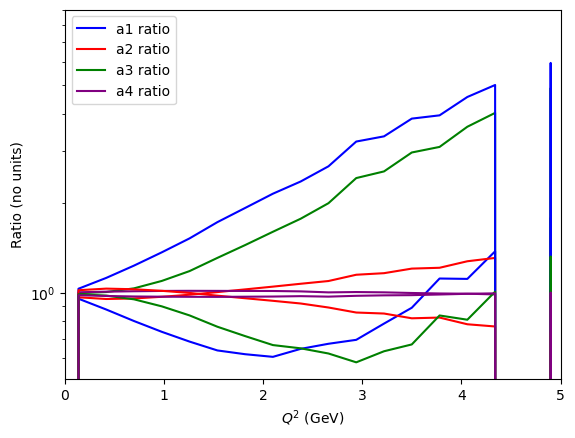

In [8]:
plt.plot(Q2, a1_ratio_new, color='blue', label='a1 ratio')
plt.plot(Q2, a2_ratio_new,label='a2 ratio',color='red')
plt.plot(Q2, a3_ratio_new,label='a3 ratio',color='green')
plt.plot(Q2, a4_ratio_new,label='a4 ratio', color='purple')

plt.plot(Q2, a1_ratio_minus_new, color='blue')
plt.plot(Q2, a2_ratio_minus_new,color='red')
plt.plot(Q2, a3_ratio_minus_new,color='green')
plt.plot(Q2, a4_ratio_minus_new,color='purple')

plt.semilogy()
plt.legend()
plt.xlim(0,5)
plt.xlabel('$Q^{2}$ (GeV)')
plt.ylabel('Ratio (no units)')
plt.show()

NameError: name 'b1_ratio' is not defined

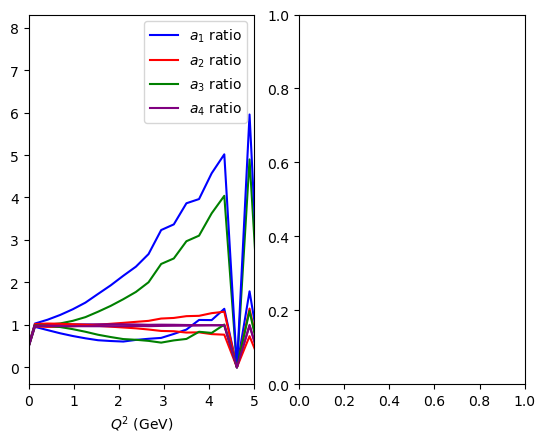

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(Q2, a1_ratio_new, color='blue', label='$a_{1}$ ratio')
ax1.plot(Q2, a2_ratio_new,label='$a_{2}$ ratio',color='red')
ax1.plot(Q2, a3_ratio_new,label='$a_{3}$ ratio',color='green')
ax1.plot(Q2, a4_ratio_new,label='$a_{4}$ ratio', color='purple')
ax1.plot(Q2, a1_ratio_minus_new, color='blue')
ax1.plot(Q2, a2_ratio_minus_new,color='red')
ax1.plot(Q2, a3_ratio_minus_new,color='green')
ax1.plot(Q2, a4_ratio_minus_new,color='purple')
ax1.legend()
ax1.set_xlim(0,5)
ax1.set_xlabel('$Q^{2}$ (GeV)')


ax2.plot(Q2, b1_ratio, color='blue', label='$b_{1}$ ratio')
ax2.plot(Q2, b2_ratio,label='$b_{2}$ ratio',color='red')
ax2.plot(Q2, b3_ratio,label='$b_{3}$ ratio',color='green')
ax2.plot(Q2, b4_ratio,label='$b_{4}$ ratio', color='purple')
ax2.plot(Q2, b1_ratio_minus_new, color='blue')
ax2.plot(Q2, b2_ratio_minus_new,color='red')
ax2.plot(Q2, b3_ratio_minus_new,color='green')
ax2.plot(Q2, b4_ratio_minus_new,color='purple')
ax2.legend()
ax2.set_xlim(0,5)
ax2.set_xlabel('$Q^{2}$ (GeV)')






plt.sharey()
plt.ylabel('Ratio (no units)')
plt.show()

In [ ]:
print(np.shape(Q2))

In [ ]:
print(a1_ratio)

In [ ]:
Q2 = np.array([0. , 0.06122449 ,0.12244898 ,0.18367347 ,0.24489796, 0.30612245,
 0.36734694, 0.42857143, 0.48979592, 0.55102041, 0.6122449,  0.67346939,
 0.73469388 ,0.79591837, 0.85714286, 0.91836735, 0.97959184, 1.04081633,
 1.10204082 ,1.16326531, 1.2244898,  1.28571429, 1.34693878, 1.40816327,
 1.46938776, 1.53061224, 1.59183673, 1.65306122, 1.71428571, 1.7755102,
 1.83673469, 1.89795918, 1.95918367, 2.02040816, 2.08163265, 2.14285714,
 2.20408163, 2.26530612, 2.32653061, 2.3877551,  2.44897959, 2.51020408,
 2.57142857, 2.63265306, 2.69387755, 2.75510204, 2.81632653, 2.87755102,
 2.93877551, 3.        ])



FA_cv =  np.array([-1.2723,     -1.12492535, -0.99789614, -0.88994176, -0.79813427 ,-0.71964571,
 -0.65209756, -0.59356719, -0.54251678, -0.49771573, -0.45817443, -0.42309165,
 -0.39181383, -0.36380386, -0.33861707 ,-0.31588272, -0.2952897 , -0.27657527,
 -0.25951626, -0.24392203, -0.22962895, -0.21649583, -0.20440034, -0.193236,
 -0.18290977, -0.17334006, -0.16445503, -0.15619124, -0.14849248 ,-0.14130879,
 -0.13459565, -0.12831326, -0.12242596, -0.11690172, -0.1117117,  -0.10682987,
 -0.1022327,  -0.09789885, -0.09380896, -0.08994541, -0.08629213, -0.08283446,
 -0.079559,   -0.07645347, -0.07350659, -0.07070801, -0.06804821 ,-0.06551842,
 -0.06311053, -0.06081707])


fractional_error_a1 =  np.array([1.,         0.99699784, 0.99006388, 0.98214956, 0.97367658, 0.96464413,
 0.95500617, 0.94473621, 0.93383037, 0.92230048, 0.91016741, 0.89745646,
 0.8841945  ,0.87040814, 0.85612284, 0.84136234, 0.82614844, 0.810501,
 0.79443792 ,0.77797528, 0.76112744, 0.7439072,  0.72632592, 0.70839362,
 0.69011914, 0.67151025, 0.65257371, 0.6333154,  0.61374036, 0.59385293,
 0.57365672, 0.55315475, 0.53234948, 0.51124281, 0.48983617, 0.46813057,
 0.44612655, 0.42382432, 0.40122368, 0.37832411, 0.35512478, 0.33162455,
 0.30782198, 0.28371537, 0.25930277, 0.23458195, 0.20955048, 0.18420567,
 0.15854461, 0.13256418])
FA_plus_one_a1 = np.array( [-1.2723 ,    -1.12154815, -0.98798093 ,-0.8740559,  -0.77712465, -0.69420201,
 -0.62275719, -0.56076442, -0.50661865, -0.45904346, -0.41701543, -0.37970633,
 -0.34643963, -0.31665785, -0.28989781, -0.26577182, -0.24395313, -0.22416454,
 -0.20616955 ,-0.18976531, -0.17477689, -0.16105281, -0.14846126, -0.13688715,
 -0.12622953 ,-0.11639963, -0.10731903 ,-0.09891832, -0.09113583, -0.08391664,
 -0.0772117  ,-0.07097709, -0.06517339, -0.05976516, -0.05472043, -0.05001033,
 -0.04560872, -0.04149191, -0.03763838, -0.03402852, -0.03064447, -0.02746994,
 -0.02449001, -0.02169102, -0.01906046, -0.01658682, -0.01425954, -0.01206886,
 -0.01000583, -0.00806216])



 #gStyle->SetOptStat(0);
   auto C  = new TCanvas("C", "A ratio example");
   auto h1 = new TH1D("h1", "TRatioPlot Example; x; y", 50, 0, 10);
   auto h2 = new TH1D("h2", "h2", 50, 0, 10);
   auto f1 = new TF1("f1", "exp(- x/[0] )");
   f1->SetParameter(0, 3);
   h1->FillRandom("f1", 1900);
   h2->FillRandom("f1", 2000);
   h1->Sumw2();
   h2->Scale(1.9 / 2.);
   h2->SetLineColor(kRed);
 
   // Create and draw the ratio plot
   auto rp = new TRatioPlot(h1, h2);
   C->SetTicks(0, 1);
   rp->Draw();
   rp->GetLowYaxis()->SetNdivisions(505);
 
   // Add a legend to the ratio plot
   rp->GetUpperPad()->cd();
   TLegend *legend = new TLegend(0.3,0.7,0.7,0.85);
   legend->AddEntry("h1","First histogram","l");
   legend->AddEntry("h2","Second histogram","le");
   legend->Draw();

In [10]:
#include <iostream>
ROOT.gStyle.SetOptStat(0)
C1  = ROOT.TCanvas("C1", "A ratio example");

#h1 = ROOT.TH1D("h1", "TRatioPlot Example; x; y", 50, 0, 8);
h1 = myFile.Q2histrwa1
h2 = myFile.Q2histrw
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h1.Draw("CHIST")
h1.GetXaxis().SetTitle("Energy (GeV)")
h1.GetYaxis().SetTitle("Counts")

histo_a1.Draw('CHIST')
histo_acv.Draw('CHIST')

#Create and draw the ratio plot
rp = ROOT.TRatioPlot(h1, h2);
C1.SetTicks(0, 1);
rp.Draw();
#rp.GetXaxis().SetTitle("Energy (GeV)")

rp.GetXaxis().SetRangeUser(0, 5);

#rp.GetLowerPad().SetRangeUser(0,1);

rp.GetLowYaxis().SetNdivisions(505);

#Add a legend to the ratio plot

rp.GetUpperPad().cd();
rp.GetLowerRefYaxis().SetTitle("Ratio");
legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry("h1","(a_{1}+ #sigma)  GENIE", "l");
legend.AddEntry("h2","a_{cv} using GENIE","l");
#legend.AddEntry("rplot2","a_{1}+ #sigma cov mat","l")
legend.Draw();
rp.GetLowerRefGraph().SetMinimum(0);
rp.GetLowerRefGraph().SetMaximum(1);
rp.GetLowerRefGraph().SetTitle("Energy (GeV)")

#rp.GetXaxis().SetRangeUser(0, 5)
#rp.Draw()
C1.Update()
C1.Draw()


Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 7 points have been skipped


In [11]:
c910=ROOT.TCanvas()
x = ROOT.TRatioPlot(myFile.Q2histrwa1minus,myFile.Q2histrw)
x.Draw()

c910.Update()
c910.Draw()

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 7 points have been skipped


In [12]:
c911=ROOT.TCanvas()
y = ROOT.TRatioPlot(myFile.Q2histrwa1,myFile.Q2histrw)
y.Draw()
c911.Draw()

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 7 points have been skipped


In [13]:
c912 = ROOT.TCanvas()


histo_a1_plus_1sigma = myFile.Q2histrwa1
histo_a1_minus_1sigma = myFile.Q2histrwa1minus
histo_cv_reweight = myFile.Q2histrw

pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

histo_a1_minus_1sigma.Draw("CHIST")
histo_a1_plus_1sigma.Draw("SAME CHIST")

pad1.Update()


legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(histo_a1_plus_1sigma,"F_{A}(a_{1}+ #sigma)  GENIE", 'l');
legend.AddEntry(histo_a1_minus_1sigma,"F_{A}(a_{1}- #sigma)  GENIE", 'l');
legend.Draw()

c912.cd()

pad2 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad2.SetGridx()
pad2.Draw()
pad2.cd()


h3 = histo_a1_minus_1sigma.Clone("h3");
h3.Divide(histo_cv_reweight)
h3.SetLineColor(ROOT.kBlack);
h3.Draw();       #// Draw the ratio plot


pad2.Update();
legend.AddEntry(histo_a1_plus_1sigma,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
legend.AddEntry(histo_a1_minus_1sigma,"F_{A}(a_{1} - #sigma)/ F_{A}(a_{cv}) GENIE", 'l');

c912.cd();
legend.DrawClone("same");

c912.Draw()

In [14]:
FA_cv=[-1.2723, -1.0379909258592515, -0.8576927791656509, -0.7196457110272436, -0.61217729795191, -0.5269419912105929, -0.4581744258309173, -0.4018522571288572, -0.3551142546372658, -0.3158827212437352, -0.2826191907572248, -0.25416401416246004, -0.22962894568883507, -0.20832374587074923, -0.18970504390395315, -0.17334005678685618, -0.15888041548430087, -0.1460429911703617, -0.13459565102573443, -0.12434653927238325, -0.11513591519308149, -0.10682987025880392, -0.09931544299684968, -0.09249678524408302, -0.08629212750610621, -0.08063135756386826, -0.07545407394331544, -0.07070801018709971, -0.06634775095049196, -0.06233367945919223, -0.05863110966373069, -0.05520956679755383, -0.0520421879089972, -0.04910521994522994, -0.046377597590825756, -0.043840586648412665, -0.041477481546204995, -0.0392733477538531, -0.03721480162333615, -0.03528982155024441, -0.03348758545202888, -0.031798330443969756, -0.030213231307036695, -0.02872429492015238, -0.027324268300317436, -0.026006558279205658, -0.024765161161123702, -0.02359460096797374, -0.02248987509265476, -0.02144640636156335]

fractional_error_a1=[1.0, 0.9925367242334439, 0.9793847362895725, 0.9646441250327771, 0.9482303848499585, 0.9300555196232237, 0.9101674083073853, 0.8886747164871466, 0.8657006047639367, 0.8413623376439514, 0.8157638429337148, 0.7889940250488329, 0.7611274414262518, 0.7322258178573225, 0.7023397402559751, 0.6715102518033899, 0.6397702601538894, 0.607145736267672, 0.5736567179913427, 0.5393181424649537, 0.5041405332966394, 0.46813056656646274, 0.4312915365632131, 0.393623738817639, 0.3551247849236414, 0.3157898609859344, 0.2756119393149034, 0.23458195116825123, 0.19268892685777383, 0.14992010834065705, 0.10626103844557484, 0.061695630100321135, 0.016206218292503845, -0.030226403021315153, -0.07762295726435246, -0.1260056733985588, -0.1753982847316549, -0.22582603744807536, -0.2773157081384846, -0.3298956297714148, -0.3835957256946608, -0.43844755137907004, -0.4944843437269311, -0.5517410778652956, -0.6102545314329771, -0.6700633564524492, -0.7312081589547114, -0.7937315865999375, -0.8576784246088964, -0.9230957003931584]
FA_plus_a1=[-1.2723, -1.0302441133363809, -0.8400112163406215, -0.6942020072474662, -0.5804851148333473, -0.49008530744666423, -0.41701542971125033, -0.3571159406737071, -0.30742262499977563, -0.2657718247669617, -0.23055051713893032, -0.20053388855660792, -0.17477689190955076, -0.15254002519931037, -0.13323739126075082, -0.11639962518055569, -0.1016469647477492, -0.08866937940086238, -0.0772116994233309, -0.06706234458232714, -0.058044681687036755, -0.05001032769047559, -0.0428339100145675, -0.03640893043638818, -0.030644473221209407, -0.02546256519620113, -0.020796043648727287, -0.016586822992914436, -0.01278447693007714, -0.009345071977793887, -0.006230202598084401, -0.0034061890111408526, -0.000843407057672713, 0.0014842741685148434, 0.0035999662758160033, 0.0055241626428211045, 0.007275079118193225, 0.008868944500572917, 0.010320249065408692, 0.011641957904838726, 0.012845694643232985, 0.013941900121101077, 0.01493996985473001, 0.015848373440165507, 0.01667475854835917, 0.017426041730340774, 0.018108487898841983, 0.018727780061502216, 0.01928908063911899, 0.019797085501243608]
fractional_error_a1_minus=[1.0, 1.0074632757665711, 1.0206152637104549, 1.0353558749672611, 1.0517696151500917, 1.0699444803768376, 1.0898325916926879, 1.1113252835129395, 1.1342993952361622, 1.1586376623561618, 1.184236157066413, 1.2110059749513098, 1.2388725585739062, 1.2677741821428528, 1.2976602597442173, 1.328489748196821, 1.3602297398463392, 1.392854263732577, 1.4263432820089288, 1.460681857535339, 1.4958594667036746, 1.5318694334338747, 1.568708463437152, 1.6063762611827477, 1.6448752150767705, 1.6842101390145068, 1.7243880606855684, 1.7654180488322513, 1.8073110731427589, 1.850079891659907, 1.8937389615550222, 1.93830436990032, 1.98379378170817, 2.0302264030220223, 2.0776229572650995, 2.1260056733993546, 2.17539828473249, 2.225826037448957, 2.2773157081394015, 2.3298956297723876, 2.383595725695688, 2.438447551380143, 2.494484343728059, 2.5517410778664793, 2.6102545314342116, 2.6700633564537357, 2.731208158956061, 2.793731586601356, 2.8576784246103855, 2.9230957003947187]

fractional_error_a2=[1.0, 1.0552716154860398, 1.0827769448949003, 1.1011029296651405, 1.1127152183931623, 1.1185264252263636, 1.1192323014933232, 1.1154400085477054, 1.1076743630145234, 1.0963807919128108, 1.0819332095338545, 1.0646439412825563, 1.0447735111778351, 1.0225393472212545, 0.998123151788812, 0.9716769909076042, 0.9433282663114747, 0.9131837558258938, 0.8813328938712924, 0.847850438768982, 0.8127986473046195, 0.7762290535156322, 0.738183928991799, 0.6986974860342413, 0.6577968723217296, 0.6155029957110116, 0.5718312099158048, 0.5267918856137165, 0.480390886654083, 0.432629967191316, 0.38350710252050185, 0.3330167639680765, 0.2811501462541331, 0.2278953541884661, 0.17323755430821342, 0.11715909604758705, 0.05963960620012057, 0.0006560597526512618, -0.05981717039236603, -0.12180828275778802, -0.18534803403938246, -0.25046974193548993, -0.31720930301645606, -0.3856052248358092, -0.45569867169754996, -0.527533523682488, -0.60115644870495, -0.6766169875255661, -0.753967651788578, -0.8332640352872711]
FA_plus_a2=[-1.2723, -1.0953623611913423, -0.9286899670833998, -0.792404000733051, -0.6811789957858956, -0.5893985417304464, -0.5128036171081195, -0.4482420851267272, -0.3933509558027107, -0.34632774806878003, -0.3057750881318249, -0.2705941777701169, -0.23991023985538865, -0.21301922711336244, -0.18934899633164867, -0.16843054478240566, -0.14987638688965232, -0.13336408718899875, -0.11862357462100111, -0.10542726788149459, -0.09358231612511601, -0.08292444907818915, -0.07331306392097554, -0.06462727131628991, -0.05676269157950455, -0.04962884212880665, -0.04314699439608267, -0.03724840601445613, -0.03187285490661111, -0.026967417699344343, -0.02248544698469915, -0.018385711275000736, -0.01463166874199964, -0.011190851491920707, -0.008034341581325145, -0.005136323501923942, -0.002473700665588434, -2.576566281317985e-05, 0.0022260841298211986, 0.004298592561864052, 0.006206858128259378, 0.007964519620280539, 0.00958391804478008, 0.011076238200935451, 0.012451632769562127, 0.01371933132788334, 0.01488773633522688, 0.015964507828818197, 0.016956638312627337, 0.01787051910724688]

fractional_error_a3=[1.0, 0.9993526485200765, 0.9951278133006599, 0.9938801756543384, 0.9918236204345341, 0.9868790807859681, 0.9782359046789975, 0.965701828562909, 0.9493595417292967, 0.9294026576859972, 0.9060590546753337, 0.8795557984633807, 0.8501039458916103, 0.8178928870807659, 0.7830892176244623, 0.7458376805050002, 0.7062629614857092, 0.6644717407016825, 0.6205547153942494, 0.5745884671749065, 0.5266371272051136, 0.47675383218807693, 0.4249819825672707, 0.3713563219638909, 0.3159038590050131, 0.2586446521215712, 0.19959247612031952, 0.13875538713105973, 0.07613620029011044, 0.011732892427417237, -0.054461059847650234, -0.12245639789915173, -0.19226784729596116, -0.26391392635557875, -0.33741679184648904, -0.41280211755105484, -0.4900990021152213, -0.5693399032247993, -0.650560595669833, -0.7338001513040414, -0.8191009392888989, -0.9065086453429861, -0.9960723090062392, -1.0878443781829443, -1.1818807804548537, -1.2782410108605455, -1.3769882360252206, -1.4781894147006815, -1.5819154349406446, -1.6882412682967516]
FA_plus_a3= [-1.2723, -1.0373189808972494, -0.85351393981488, -0.7152416056846481, -0.6071719040024939, -0.5200280279134376, -0.44820267395348756, -0.38806945952146965, -0.33713110604397545, -0.29358224064101246, -0.2560696768105989, -0.22355143241732053, -0.19520847282100898, -0.17038650995770688, -0.14855597441016094, -0.12928354589251384, -0.11221135276202227, -0.09704144056025069, -0.08352396591557834, -0.071448087399023, -0.06063484761541603, -0.050931550038039834, -0.04220727386434794, -0.03434926596172656, -0.02726001608093159, -0.02085486942719672, -0.015060065451712009, -0.009811117326777936, -0.005051465655165021, -0.0007313543556998099, 0.003193112372330581, 0.006760764679601048, 0.01000603943783479, 0.012959551400299911, 0.015648580192643886, 0.01809748700314525, 0.020328072316047573, 0.02235988400949261, 0.024210483511812236, 0.02589567639306197, 0.02742971269827412, 0.02882546145493166, 0.030094563070539634, 0.03124756274615667, 0.03229402754413699, 0.03324264934381553, 0.03410133558213603, 0.034877289394945235, 0.03557708053895772, 0.03620670827625323]

fractional_error_a4 =[1.0, 1.0161335377554293, 1.020599251006302, 1.0245679149930502, 1.0288253350496752, 1.0331580363802153, 1.0373462870433083, 1.041255278391931, 1.0448149364615111, 1.0479951997377237, 1.050789149875031, 1.0532027058129776, 1.0552485309165829, 1.0569424755387689, 1.0583015200165868, 1.0593426040182883, 1.060081980616249, 1.0605348813535602, 1.0607153650633707, 1.0606362741237667, 1.0603092521065947, 1.0597447949636931, 1.0589523189202599, 1.0579402349832372, 1.056716024113169, 1.0552863096590621, 1.05365692522592, 1.051832977104826, 1.0498189009748369, 1.0476185129269633, 1.0452350550522351, 1.0426712359348003, 1.0399292664326298, 1.0370108911355846, 1.0339174158771074, 1.0306497316515837, 1.027208335259073, 1.023593346967183, 1.0198045254473211, 1.0158412802118109, 1.0117026817489205, 1.0073874695258298, 1.0028940580042982, 0.9982205407910496, 0.9933646930236031, 0.9883239720728362, 0.9830955166255396, 0.9776761441936455, 0.9720623470809506, 0.9662502868231917]
FA_plus_a4= [-1.2723, -1.0547373916513947, -0.875360608009977, -0.7373259056808742, -0.6298235136751786, -0.5444143529254168, -0.47528553945390173, -0.41843078386913407, -0.37102867739541173, -0.3310435755435239, -0.2969731791941535, -0.26768622743619086, -0.24231560759406703, -0.22018621567413907, -0.20076513631836698, -0.1836265071372662, -0.1684262655277302, -0.1548836863133786, -0.14276767511370395, -0.1318864501140452, -0.12207967612898454, -0.11321239895341409, -0.10517031866610685, -0.09785607071631922, -0.09118627389051918, -0.08508916776637483, -0.07950270754688296, -0.07437301686025546, -0.06965312298499766, -0.06530191658030496, -0.06128329113714318, -0.05756542724823036, -0.05412019429575254, -0.05092264789481178, -0.04795060585569493, -0.04518428886463452, -0.04260601476981615, -0.04019993747397259, -0.03795182310910252, -0.03584885750204664, -0.03387948000711376, -0.03203323964109685, -0.03030067015093654, -0.028673181209036107, -0.0271429633922394, -0.025702904978448238, -0.024346518906009654, -0.02306787849815622, -0.021861560768123397, -0.02072259629818731]



fractional_error_a2_minus=[1.0, 0.94472838451395, 0.9172230551050804, 0.8988970703348299, 0.8872847816067982, 0.8814735747735857, 0.8807676985066148, 0.8845599914522202, 0.8923256369853894, 0.9036192080870884, 0.9180667904660299, 0.9353560587173132, 0.9552264888220177, 0.9774606527785819, 1.0018768482110056, 1.0283230090921944, 1.0566717336883034, 1.0868162441738622, 1.1186671061284437, 1.152149561230731, 1.1872013526950678, 1.2237709464840292, 1.2618160710078399, 1.3013025139653664, 1.3422031276778483, 1.384497004288534, 1.4281687900837121, 1.473208114385768, 1.519609113345365, 1.5673700328080924, 1.6164928974788688, 1.6669832360312629, 1.7188498537451602, 1.7721046458107856, 1.8267624456909939, 1.882840903951578, 1.940360393798999, 1.9993439402464122, 2.0598171703913812, 2.12180828275675, 2.185348034038292, 2.250469741934338, 2.3172093030152445, 2.3856052248345367, 2.4556986716962, 2.527533523681076, 2.60115644870348, 2.676616987524005, 2.753967651786956, 2.833264035285568]


fractional_error_a3_minus=[1.0000000000000002, 1.0006473514798826, 1.0048721866992631, 1.006119824345548, 1.008176379565315, 1.0131209192138413, 1.0217640953207703, 1.034298171436814, 1.0506404582703797, 1.0705973423136297, 1.0939409453242412, 1.1204442015361378, 1.1498960541078496, 1.1821071129186327, 1.2169107823748708, 1.254162319494265, 1.2937370385134828, 1.335528259297434, 1.379445284604789, 1.4254115328240486, 1.4733628727937527, 1.5232461678106985, 1.5750180174314132, 1.6286436780346882, 1.6840961409934616, 1.7413553478767962, 1.8004075238779331, 1.8612446128670768, 1.9238637997078998, 1.988267107570465, 2.0544610598453965, 2.1224563978967645, 2.1922678472934227, 2.2639139263528922, 2.3374167918436424, 2.412802117548053, 2.4900990021120473, 2.569339903221444, 2.6505605956662888, 2.7338001513003154, 2.819100939284964, 2.9065086453388456, 2.9960723090018844, 3.0878443781783798, 3.181880780450053, 3.2782410108554907, 3.376988236019928, 3.478189414695134, 3.5819154349348326, 3.6882412682906605]



fractional_error_a4_minus= [1.0, 0.9838664622445622, 0.9794007489936835, 0.9754320850069276, 0.9711746649502969, 0.9668419636197495, 0.9626537129566494, 0.9587447216080185, 0.9551850635384304, 0.9520048002622089, 0.9492108501248923, 0.9467972941869353, 0.9447514690833198, 0.9430575244611236, 0.9416984799832925, 0.9406573959815793, 0.9399180193836048, 0.9394651186462804, 0.9392846349364558, 0.939363725876045, 0.9396907478931996, 0.9402552050360847, 0.9410476810795024, 0.942059765016504, 0.9432839758865522, 0.9447136903406381, 0.9463430747737589, 0.9481670228948318, 0.9501810990247972, 0.952381487072644, 0.9547649449473435, 0.957328764064762, 0.9600707335669015, 0.962989108863914, 0.9660825841223608, 0.9693502683478632, 0.9727916647403402, 0.9764066530321917, 0.9801954745520186, 0.9841587197875022, 0.9882973182503401, 0.9926125304733917, 0.9971059419948872, 1.0017794592081046, 1.0066353069754839, 1.0116760279262027, 1.0169044833734633, 1.0223238558053078, 1.0279376529179498, 1.0337497131756548]




Q2 = [0.0, 0.10204081632653061, 0.20408163265306123, 0.30612244897959184, 0.40816326530612246, 0.5102040816326531, 0.6122448979591837, 0.7142857142857143, 0.8163265306122449, 0.9183673469387755, 1.0204081632653061, 1.1224489795918369, 1.2244897959183674, 1.3265306122448979, 1.4285714285714286, 1.5306122448979593, 1.6326530612244898, 1.7346938775510203, 1.836734693877551, 1.9387755102040818, 2.0408163265306123, 2.142857142857143, 2.2448979591836737, 2.3469387755102042, 2.4489795918367347, 2.5510204081632653, 2.6530612244897958, 2.7551020408163267, 2.857142857142857, 2.9591836734693877, 3.0612244897959187, 3.163265306122449, 3.2653061224489797, 3.36734693877551, 3.4693877551020407, 3.5714285714285716, 3.673469387755102, 3.7755102040816326, 3.8775510204081636, 3.979591836734694, 4.081632653061225, 4.183673469387755, 4.285714285714286, 4.387755102040816, 4.4897959183673475, 4.591836734693878, 4.6938775510204085, 4.795918367346939, 4.8979591836734695, 5.0]

In [15]:
histo_a1.SetTitle('')
histo_a1.SetMarkerColor(ROOT.kBlack)

histo_a1.SetXTitle('Q^{2} (GeV)')

In [16]:

h1 = histo_a1
h2 = histo_acv
h1_minus = histo_a1_minus


canvas = ROOT.TCanvas()
canvas.SetCanvasSize(1000, 1000);
canvas.SetWindowSize(500, 500)
# // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

h1.SetStats(0);  
h1.SetLineColor(ROOT.kBlue)
h1.DrawCopy("l")
h1_minus.DrawCopy("same l")


h2.Draw("same l")

h2.SetTitle("Comparing the Axial Form factor using GENIE")
#graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a1)));
#graph3.SetLineColor(ROOT.kGreen+3)
#graph3.Scale(h2[1])
#graph3.Draw("same ");

pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{1}+ #sigma)  GENIE", 'l');
legend.AddEntry(h1_minus,"F_{A}(a_{1}- #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2);
pad2.SetGridx()
pad2.Draw()
pad2.cd() #pad2 becomes the current pad


h3_minus = h1_minus.Clone("h3_minus");
h3_minus.Divide(h2)
h3_minus.SetLineColor(ROOT.kBlack);
h3_minus.Draw('l');

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineStyle(2)
h3.SetLineWidth(2)
h3.SetLineColor(ROOT.kBlack);
h3.Draw('samel ');       #// Draw the ratio plot


pad2.Update();

h3_minus.GetYaxis().SetTitle("Ratio");
h3_minus.GetYaxis().SetRangeUser(0,11);
h3_minus.GetXaxis().SetTitle("Q^{2} (GeV)^{2}");
h3_minus.GetYaxis().SetRangeUser(0,3);
h3_minus.GetXaxis().SetRangeUser(0,3);
h3_minus.SetLineStyle(2)
h3_minus.SetLineWidth(2)
h3_minus.SetTitle("")
h3_minus.GetXaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelColor(ROOT.kBlack);
pad2.Update();
#legend.AddEntry(graph,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{1} #pm #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
canvas.cd();
legend.DrawClone("same");
canvas.Update();
canvas.Draw()

canvas.SaveAs("filename.svg","SVG")

Info in <TCanvas::Print>: SVG file filename.svg has been created


In [ ]:

h1 = histo_a2
h2 = histo_acv
h1_minus = histo_a2_minus


canvas = ROOT.TCanvas()
canvas.SetCanvasSize(1000, 1000);
canvas.SetWindowSize(500, 500)
# // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

h1.SetStats(0);  
h1.SetLineColor(ROOT.kBlue)
h1.DrawCopy("l")
h1_minus.DrawCopy("same l")


h2.Draw("same l")

h2.SetTitle("Comparing the Axial Form factor using GENIE")
#graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a1)));
#graph3.SetLineColor(ROOT.kGreen+3)
#graph3.Scale(h2[1])
#graph3.Draw("same ");

pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{2}+ #sigma)  GENIE", 'l');
legend.AddEntry(h1_minus,"F_{A}(a_{2}- #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2);
pad2.SetGridx()
pad2.Draw()
pad2.cd() #pad2 becomes the current pad


h3_minus = h1_minus.Clone("h3_minus");
h3_minus.Divide(h2)
h3_minus.SetLineColor(ROOT.kBlack);
h3_minus.Draw('l');

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineStyle(2)
h3.SetLineWidth(2)
h3.SetLineColor(ROOT.kBlack);
h3.Draw('samel ');       #// Draw the ratio plot


pad2.Update();

h3_minus.GetYaxis().SetTitle("Ratio");
h3_minus.GetYaxis().SetRangeUser(0,1.5);
h3_minus.GetXaxis().SetRangeUser(0,3);
h3_minus.GetXaxis().SetTitle("Q^{2} (GeV)^{2}");

h3_minus.SetLineStyle(2)
h3_minus.SetLineWidth(2)
h3_minus.SetTitle("")
h3_minus.GetXaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelColor(ROOT.kBlack);
pad2.Update();
#legend.AddEntry(graph,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{2} #pm #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
canvas.cd();
legend.DrawClone("same");
canvas.Update();
canvas.Draw()



In [ ]:

h1 = histo_a3
h2 = histo_acv
h1_minus = histo_a3_minus


canvas = ROOT.TCanvas()
canvas.SetCanvasSize(1000, 1000);
canvas.SetWindowSize(500, 500)
# // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

h1.SetStats(0);  
h1.SetLineColor(ROOT.kBlue)
h1.DrawCopy("l")
h1_minus.DrawCopy("same l")


h2.Draw("same l")

h2.SetTitle("Comparing the Axial Form factor using GENIE")
#graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a1)));
#graph3.SetLineColor(ROOT.kGreen+3)
#graph3.Scale(h2[1])
#graph3.Draw("same ");

pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{3}+ #sigma)  GENIE", 'l');
legend.AddEntry(h1_minus,"F_{A}(a_{3}- #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2);
pad2.SetGridx()
pad2.Draw()
pad2.cd() #pad2 becomes the current pad


h3_minus = h1_minus.Clone("h3_minus");
h3_minus.Divide(h2)
h3_minus.SetLineColor(ROOT.kBlack);
h3_minus.Draw('l');

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineStyle(2)
h3.SetLineWidth(2)
h3.SetLineColor(ROOT.kBlack);
h3.Draw('samel ');       #// Draw the ratio plot


pad2.Update();

h3_minus.GetYaxis().SetTitle("Ratio");
h3_minus.GetYaxis().SetRangeUser(0,10);
h3_minus.GetXaxis().SetTitle("Q^{2} (GeV)^{2}");

h3_minus.SetLineStyle(2)
h3_minus.SetLineWidth(2)
h3_minus.SetTitle("")
h3_minus.GetXaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelColor(ROOT.kBlack);
pad2.Update();
#legend.AddEntry(graph,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{3} #pm #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
canvas.cd();
legend.DrawClone("same");
canvas.Update();
canvas.Draw()



In [ ]:

h1 = histo_a4
h2 = histo_acv
h1_minus = histo_a4_minus


canvas = ROOT.TCanvas()
canvas.SetCanvasSize(1000, 1000);
canvas.SetWindowSize(500, 500)
# // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

h1.SetStats(0);  
h1.SetLineColor(ROOT.kBlue)
h1.DrawCopy("l")
h1_minus.DrawCopy("same l")


h2.Draw("same l")

h2.SetTitle("Comparing the Axial Form factor using GENIE")
#graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a1)));
#graph3.SetLineColor(ROOT.kGreen+3)
#graph3.Scale(h2[1])
#graph3.Draw("same ");

pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{4}+ #sigma)  GENIE", 'l');
legend.AddEntry(h1_minus,"F_{A}(a_{4}- #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2);
pad2.SetGridx()
pad2.Draw()
pad2.cd() #pad2 becomes the current pad


h3_minus = h1_minus.Clone("h3_minus");
h3_minus.Divide(h2)
h3_minus.SetLineColor(ROOT.kBlack);
h3_minus.Draw('l');

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineStyle(2)
h3.SetLineWidth(2)
h3.SetLineColor(ROOT.kBlack);
h3.Draw('samel ');       #// Draw the ratio plot


pad2.Update();

h3_minus.GetYaxis().SetTitle("Ratio");
h3_minus.GetYaxis().SetRangeUser(0.8,1.15);
h3_minus.GetXaxis().SetTitle("Q^{2} (GeV)^{2}");

h3_minus.SetLineStyle(2)
h3_minus.SetLineWidth(2)
h3_minus.SetTitle("")
h3_minus.GetXaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelColor(ROOT.kBlack);
pad2.Update();
#legend.AddEntry(graph,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{4} #pm #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
canvas.cd();
legend.DrawClone("same");
canvas.Update();
canvas.Draw()



In [ ]:

h1 = histo_altogether
h2 = histo_acv
h1_minus = histo_altogether_minus


canvas = ROOT.TCanvas()
canvas.SetCanvasSize(1000, 1000);
canvas.SetWindowSize(500, 500)
# // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)
pad1.SetGridx()
pad1.Draw()
pad1.cd()

h1.SetStats(0);  
h1.SetLineColor(ROOT.kBlue)
h1.DrawCopy("l")
h1_minus.DrawCopy("same l")


h2.Draw("same l")

h2.SetTitle("Comparing the Axial Form factor using GENIE")
#graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a1)));
#graph3.SetLineColor(ROOT.kGreen+3)
#graph3.Scale(h2[1])
#graph3.Draw("same ");

pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{i}+ #sigma)  GENIE", 'l');
legend.AddEntry(h1_minus,"F_{A}(a_{i}- #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2);
pad2.SetGridx()
pad2.Draw()
pad2.cd() #pad2 becomes the current pad


h3_minus = h1_minus.Clone("h3_minus");
h3_minus.Divide(h2)
h3_minus.SetLineColor(ROOT.kBlack);
h3_minus.Draw('l');

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineStyle(2)
h3.SetLineWidth(2)
h3.SetLineColor(ROOT.kBlack);
h3.Draw('samel ');       #// Draw the ratio plot


pad2.Update();

h3_minus.GetYaxis().SetTitle("Ratio");
h3_minus.GetYaxis().SetRangeUser(0,1.5);
h3_minus.GetXaxis().SetTitle("Q^{2} (GeV^{2})");

h3_minus.SetLineStyle(2)
h3_minus.SetLineWidth(2)
h3_minus.SetTitle("")
h3_minus.GetXaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetTitleSize(18);
h3_minus.GetYaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelSize(18);
h3_minus.GetXaxis().SetLabelColor(ROOT.kBlack);
pad2.Update();
#legend.AddEntry(graph,"F_{A}(a_{1} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{i} #pm #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
canvas.cd();
legend.DrawClone("same");
canvas.Update();
canvas.Draw()



In [ ]:
 #TH1F *h1 = new TH1F("h1", "Two gaussian plots and their ratio;x title; h1 and h2 gaussian histograms", 100, -5, 5);
  # TH1F *h2 = new TH1F("h2", "h2", 100, -5, 5);
#h1->FillRandom("gaus");
#h2->FillRandom("gaus");
h1 = histo_a1
h2 = histo_acv
   #// Define the Canvas
#TCanvas *c = new TCanvas("c", "canvas", 800, 800);
canvas = ROOT.TCanvas()

  # // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
   #TPad *pad1 = new TPad("pad1", "pad1", 0, 0.3, 1, 1.0);
pad1.SetBottomMargin(0)

   #pad1->SetBottomMargin(0); // Upper and lower plot are joined
  # pad1->SetGridx();         // Vertical grid
pad1.SetGridx()

   #pad1->Draw();             // Draw the upper pad: pad1
pad1.Draw()
 #  pad1->cd();               // pad1 becomes the current pad
pad1.cd()
 #  h1->SetStats(0);          // No statistics on upper plot
h1.SetStats(0);  
   #h1->Draw();               // Draw h1
h1.SetLabelColor(ROOT.kBlue)
h1.SetLineColor(ROOT.kBlue)
h1.Draw("CHIST l")
  # h2->Draw("same");         // Draw h2 on top of h1
h2.Draw("same CHIST l")


graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_a4)));
graph3.SetLineColor(ROOT.kGreen+3)
graph3.Scale(h2[1])
graph3.Draw("same ");
pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{4}+ #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');
legend.AddEntry(graph3,"F_{A}(a_{4}+ #sigma) thrown", 'l');
 
#if ROOT_VERSION_CODE >= ROOT_VERSION(6,8,0)
#// Avoid the first label (0) to be clipped.
   #TAxis *axis = h1->GetYaxis();
   #axis->ChangeLabel(1, -1, -1, -1, -1, -1, " ");
   #axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   #axis->SetLabelSize(15);
#else
   #// Do not draw the Y axis label on the upper plot and redraw a small
   #// axis instead, in order to avoid the first label (0) to be clipped.
   #h1->GetYaxis()->SetLabelSize(0.);
   #TGaxis *axis = new TGaxis( -5, 20, -5, 220, 20,220,510,"");
  # axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
  # axis->SetLabelSize(15);
  # axis->Draw();
#endif
 
  # // lower plot will be in pad
   #c->cd();          // Go back to the main canvas before defining pad2
canvas.cd()
   #TPad *pad2 = new TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
   #pad2->SetTopMargin(0);
pad2.SetTopMargin(0)
   #pad2->SetBottomMargin(0.2);
pad2.SetBottomMargin(0.2);
   #pad2->SetGridx(); // vertical grid\
pad2.SetGridx()
   #pad2->Draw();
pad2.Draw()
   #pad2->cd();       // pad2 becomes the current pad
pad2.cd()


 #// Define the ratio plot
#TH1F *h3 = (TH1F*)h1->Clone("h3");

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineColor(ROOT.kBlack);
#h3.SetMinimum(-1);  #// Define Y ..
#h3.SetMaximum(1); #// .. range
   #h3->Sumw2();
   #h3->SetStats(0);      // No statistics on lower plot
   #h3->Divide(h2);
   #h3->SetMarkerStyle(21);
h3.Draw();       #// Draw the ratio plot

h3.GetYaxis().SetTitle("Ratio");
h3.GetYaxis().SetRangeUser(-2,4);

h3.GetXaxis().SetRangeUser(0,5);
h3.GetYaxis().SetNdivisions(505);
h3.GetYaxis().SetTitleSize(12);
h3.GetXaxis().SetTitle("Energy (GeV)");
h3.GetXaxis().SetTitleSize(12);
h3.GetYaxis().SetLabelSize(12);
h3.GetXaxis().SetLabelSize(12);
h3.GetXaxis().SetLabelColor(ROOT.kBlack);


graph = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(1,fractional_error_a4)));
graph.SetLineColor(ROOT.kMagenta)
graph.Draw("same  l");
pad2.Update();
graph2 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(1,fractional_error_a4_minus)));
graph2.SetLineColor(ROOT.kMagenta)
graph2.Draw("same l ");





pad2.Update();
legend.AddEntry(graph,"F_{A}(a_{4} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{4} + #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
#legend.AddEntry("rplot2","a_{1}+ #sigma cov mat","l")
canvas.cd();
legend.DrawClone("same");
canvas.Draw()

In [ ]:
 #TH1F *h1 = new TH1F("h1", "Two gaussian plots and their ratio;x title; h1 and h2 gaussian histograms", 100, -5, 5);
  # TH1F *h2 = new TH1F("h2", "h2", 100, -5, 5);
#h1->FillRandom("gaus");
#h2->FillRandom("gaus");


FA_plus_i = [1.2723, 1.0386970404194165, 0.8585614585140573, 0.7204952692887494, 0.6129462138514445, 0.5276134289841838, 0.45874897143048454, 0.4023371069653613, 0.35551869462819496, 0.3162162075033531, 0.2828905636898509, 0.25438122052610385, 0.22979898884792554, 0.20845273492778765, 0.18979828095933268, 0.17340213387970588, 0.15891530832864476, 0.14605414437122996, 0.13458605312147598, 0.12431878766865281, 0.11509227180213534, 0.10677230892370808, 0.09924568981294157, 0.09241635281678243, 0.08620234406952945, 0.08053339176068967, 0.07534895594803687, 0.07059664974863618, 0.06623095283764774, 0.06221215671390405, 0.058505495000665805, 0.055080422433208015, 0.05191001405725752, 0.048970462177983475, 0.0462406532303082, 0.04370181033150889, 0.04133719007888616, 0.03913182435559911, 0.03707229964609512, 0.03514656774370165, 0.03334378283625113, 0.031654160841511784, 0.03006885757903626, 0.028579862944569646, 0.027179908725091254, 0.025862388078537295, 0.02462128501922373, 0.02345111251131463, 0.022346857988959416, 0.021303935301355586, 4.501540236726174e-17, 0.061892737852740826, 0.07549149596778622, 0.07563580146968686, 0.07172876928281227, 0.06686368213261377, 0.062125892352771356, 0.05787238642908659, 0.05417944022451799, 0.051015908909577225, 0.04831435941435237, 0.04600079156583479, 0.04400658162856229, 0.04227256059139951, 0.040749626478490474, 0.039397916835335826, 0.038185486854109406, 0.03708692572370304, 0.036082094899328246, 0.03515505137363865, 0.0342931624898706, 0.03348639455331641, 0.03272674921963149, 0.03200782095870357, 0.03132445148278366, 0.03067246071412039, 0.030048437615365565, 0.0294495775724831, 0.028873555859974934, 0.02831842902876238, 0.02778255789482848, 0.027264547247454543, 0.026763198514835364, 0.026277472488767696, 0.025806459874746675, 0.025349357944193775, 0.0249054519572368, 0.024474100325150898, 0.024054722712619873, 0.02364679045776906, 0.023249818824982702, 0.022863360711399015, 0.02248700150995448, 0.02212035489547481, 0.02176305934981421, 0.02141477528066055, 0.021075182618824122, 0.02074397880250674, 0.020420877075663337, 0.020105605042238857]
FA_minus_i = [1.2723, 0.9759450406537086, 0.781777877988664, 0.6433966918688887, 0.5397212103869419, 0.4592931184499961, 0.3952453150728028, 0.34318605388383516, 0.300168533520226, 0.26413928406138865, 0.2336222028032879, 0.20752802320305422, 0.1850346370460752, 0.16550935045404452, 0.14845690970742004, 0.13348386610089283, 0.12027358185262524, 0.10856833291640419, 0.09815624861431319, 0.08886161458654551, 0.08053755867187895, 0.07306045488390447, 0.0663255864204835, 0.060243745243362026, 0.05473853800959971, 0.0497442314647422, 0.045204014579277634, 0.04106858599044387, 0.03729499778385938, 0.03384570301387442, 0.0306877664297221, 0.027792206879537314, 0.02513344665703964, 0.022688848231268946, 0.02043832277983287, 0.018363998033017272, 0.016449935349162198, 0.01468188784175872, 0.013047092884950907, 0.011534093525634795, 0.010132584294389901, 0.008833277685206121, 0.00762778820459354, 0.006508531404476995, 0.0054686357338009535, 0.004501865389423827, 0.0036025526321478048, 0.002765538270059431, 0.001986119207872457, 0.0012600021249346942]

h1 = histo_a1
h2 = histo_acv
   #// Define the Canvas
#TCanvas *c = new TCanvas("c", "canvas", 800, 800);
canvas = ROOT.TCanvas()

  # // Upper plot will be in pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
   #TPad *pad1 = new TPad("pad1", "pad1", 0, 0.3, 1, 1.0);
pad1.SetBottomMargin(0)

   #pad1->SetBottomMargin(0); // Upper and lower plot are joined
  # pad1->SetGridx();         // Vertical grid
pad1.SetGridx()

   #pad1->Draw();             // Draw the upper pad: pad1
pad1.Draw()
 #  pad1->cd();               // pad1 becomes the current pad
pad1.cd()
 #  h1->SetStats(0);          // No statistics on upper plot
h1.SetStats(0);  
   #h1->Draw();               // Draw h1
h1.SetLabelColor(ROOT.kBlue)
h1.SetLineColor(ROOT.kBlue)
h1.Draw("CHIST l")
  # h2->Draw("same");         // Draw h2 on top of h1
h2.Draw("same CHIST l")


graph3 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(-1,FA_plus_i)));
graph3.SetLineColor(ROOT.kGreen+3)
graph3.Scale(h2[1])
graph3.Draw("same ");
pad1.Update();

legend= ROOT.TLegend(0.3,0.7,0.7,0.85);
legend.AddEntry(h1,"F_{A}(a_{i}+ #sigma)  GENIE", 'l');
legend.AddEntry(h2,"F_{A}(a_{cv}) GENIE", 'l');
legend.AddEntry(graph3,"F_{A}(a_{i}+ #sigma) thrown", 'l');
 
#if ROOT_VERSION_CODE >= ROOT_VERSION(6,8,0)
#// Avoid the first label (0) to be clipped.
   #TAxis *axis = h1->GetYaxis();
   #axis->ChangeLabel(1, -1, -1, -1, -1, -1, " ");
   #axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   #axis->SetLabelSize(15);
#else
   #// Do not draw the Y axis label on the upper plot and redraw a small
   #// axis instead, in order to avoid the first label (0) to be clipped.
   #h1->GetYaxis()->SetLabelSize(0.);
   #TGaxis *axis = new TGaxis( -5, 20, -5, 220, 20,220,510,"");
  # axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
  # axis->SetLabelSize(15);
  # axis->Draw();
#endif
 
  # // lower plot will be in pad
   #c->cd();          // Go back to the main canvas before defining pad2
canvas.cd()
   #TPad *pad2 = new TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
   #pad2->SetTopMargin(0);
pad2.SetTopMargin(0)
   #pad2->SetBottomMargin(0.2);
pad2.SetBottomMargin(0.2);
   #pad2->SetGridx(); // vertical grid\
pad2.SetGridx()
   #pad2->Draw();
pad2.Draw()
   #pad2->cd();       // pad2 becomes the current pad
pad2.cd()


 #// Define the ratio plot
#TH1F *h3 = (TH1F*)h1->Clone("h3");

h3 = h1.Clone("h3");
h3.Divide(h2)
h3.SetLineColor(ROOT.kBlack);
#h3.SetMinimum(-1);  #// Define Y ..
#h3.SetMaximum(1); #// .. range
   #h3->Sumw2();
   #h3->SetStats(0);      // No statistics on lower plot
   #h3->Divide(h2);
   #h3->SetMarkerStyle(21);
h3.Draw();       #// Draw the ratio plot

h3.GetYaxis().SetTitle("Ratio");
h3.GetYaxis().SetRangeUser(-2,4);

h3.GetXaxis().SetRangeUser(0,5);
h3.GetYaxis().SetNdivisions(505);
h3.GetYaxis().SetTitleSize(12);
h3.GetXaxis().SetTitle("Energy (GeV)");
h3.GetXaxis().SetTitleSize(12);
h3.GetYaxis().SetLabelSize(12);
h3.GetXaxis().SetLabelSize(12);
h3.GetXaxis().SetLabelColor(ROOT.kBlack);


graph = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(1,a_altogether_ratio)));
graph.SetLineColor(ROOT.kMagenta)
graph.Draw("same  l");
pad2.Update();
graph2 = ROOT.TGraph(50, np.array(Q2), np.array(np.multiply(1,a_altogether_ratio_minus)));
graph2.SetLineColor(ROOT.kMagenta)
graph2.Draw("same l ");





pad2.Update();
legend.AddEntry(graph,"F_{A}(a_{i} + #sigma)/ F_{A}(a_{cv}) thrown", 'l');
legend.AddEntry(h3,"F_{A}(a_{i} + #sigma)/ F_{A}(a_{cv}) GENIE", 'l');
#legend.AddEntry("rplot2","a_{1}+ #sigma cov mat","l")
canvas.cd();
legend.DrawClone("same");
canvas.Draw()